In [18]:
#Test flow cytometry data output counts-poisson model fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, chisquare

#try doing the same with the even more truncated dataset
#eliminated all rows beyond the last value counted < 1499.1
# Specify the path to your CSV file
df = pd.read_csv('CD127 trunk data_excluding zeros past 900_844-218v1.csv')

df = pd.DataFrame(df)
print(df)

# Create a new DataFrame with repeated values based on counts
result_array = np.repeat(df['value'], df['count'])
result_df = pd.DataFrame({'value': np.repeat(df['value'], df['count'])})

# Convert the result to a NumPy array if needed
result_array = result_df['value'].to_numpy()

print(result_array)
print(result_df['value'])

     value  count
0      0.0      1
1      1.3      0
2      2.5      0
3      3.8      0
4      5.1      0
..     ...    ...
569  804.4      0
570  806.2      0
571  807.9      0
572  809.7      0
573  811.4      1

[574 rows x 2 columns]
[  0.    8.9   8.9  10.2  12.7  14.   14.   17.8  21.7  22.9  24.2  25.5
  29.3  30.6  30.6  37.   37.   40.8  42.1  42.1  44.6  45.9  45.9  45.9
  45.9  45.9  49.7  52.3  52.3  52.3  54.8  58.6  58.6  58.6  59.9  61.2
  61.2  62.5  65.   66.3  70.1  70.1  73.9  73.9  75.2  76.5  77.8  77.8
  80.3  81.6  81.6  81.6  82.9  82.9  84.2  84.2  84.2  85.4  86.7  86.7
  90.6  90.6  94.4  95.7  97.   97.   99.5  99.5 104.6 104.6 104.6 107.2
 111.  112.3 112.3 114.9 116.2 116.2 116.2 120.  122.6 126.4 131.6 131.6
 132.9 132.9 134.1 135.4 138.  138.  139.3 141.9 141.9 148.3 154.7 157.3
 159.9 161.2 161.2 162.5 163.8 166.3 176.7 179.3 179.3 180.6 183.2 183.2
 185.7 187.  187.  188.3 188.3 194.8 196.1 196.1 201.3 202.6 203.9 211.7
 213.  215.6 216.9 218.2 220.8

In [19]:
result_array = np.array([0.0, 8.9, 8.9, 10.2, 12.7, 14.0, 14.0, 17.8, 21.7, 22.9, 24.2, 25.5, 29.3, 30.6,
                         30.6, 37.0, 37.0, 40.8, 42.1, 42.1, 44.6, 45.9, 45.9, 45.9, 45.9, 45.9, 49.7, 52.3,
                         52.3, 52.3, 54.8, 58.6, 58.6, 58.6, 59.9, 61.2, 61.2, 62.5, 65.0, 66.3, 70.1, 70.1,
                         73.9, 73.9, 75.2, 76.5, 77.8, 77.8, 80.3, 81.6, 81.6, 81.6, 82.9, 82.9, 84.2, 84.2,
                         84.2, 85.4, 86.7, 86.7, 90.6, 90.6, 94.4, 95.7, 97.0, 97.0, 99.5, 99.5, 104.6, 104.6,
                         104.6, 107.2, 111.0, 112.3, 112.3, 114.9, 116.2, 116.2, 116.2, 120.0, 122.6, 126.4,
                         131.6, 131.6, 132.9, 132.9, 134.1, 135.4, 138.0, 138.0, 139.3, 141.9, 141.9, 148.3,
                         154.7, 157.3, 159.9, 161.2, 161.2, 162.5, 163.8, 166.3, 176.7, 179.3, 179.3, 180.6,
                         183.2, 183.2, 185.7, 187.0, 187.0, 188.3, 188.3, 194.8, 196.1, 196.1, 201.3, 202.6,
                         203.9, 211.7, 213.0, 215.6, 216.9, 218.2, 220.8, 220.8, 220.8, 222.2, 222.2, 224.8,
                         224.8, 226.1, 226.1, 227.4, 232.6, 235.2, 239.2, 239.2, 244.4, 248.3, 248.3, 252.3,
                         258.9, 262.8, 264.1, 270.7, 273.4, 278.7, 280.0, 288.0, 288.0, 289.3, 292.0, 292.0,
                         297.3, 297.3, 301.3, 305.3, 309.3, 309.3, 312.0, 312.0, 314.7, 314.7, 316.0, 316.0,
                         321.4, 325.4, 325.4, 328.1, 332.1, 333.5, 334.8, 334.8, 337.5, 338.9, 340.2, 340.2, 
                         341.6, 342.9, 342.9, 352.4, 353.8, 355.1, 356.5, 359.2, 360.6, 363.3, 364.7, 366.0, 
                         368.7, 371.5, 374.2, 377.0, 379.7, 382.4, 382.4, 382.4, 383.8, 385.2, 385.2, 386.6, 
                         386.6, 387.9, 389.3, 392.1, 392.1, 396.2, 397.6, 399.0, 400.4, 405.9, 405.9, 405.9, 
                         407.3, 408.7, 408.7, 411.4, 414.2, 414.2, 415.6, 419.8, 421.2, 422.6, 426.8, 429.6, 
                         429.6, 432.4, 433.8, 436.6, 442.2, 443.6, 446.5, 449.3, 452.1, 454.9, 454.9, 456.4, 
                         456.4, 459.2, 462.0, 462.0, 467.7, 467.7, 469.2, 472.0, 472.0, 472.0, 472.0, 473.5, 
                         473.5, 474.9, 482.1, 484.9, 484.9, 487.8, 489.2, 499.4, 503.7, 511.0, 513.9, 515.4, 
                         515.4, 530.0, 531.5, 540.3, 541.8, 543.3, 546.3, 552.2, 552.2, 555.2, 558.2, 558.2, 
                         562.7, 562.7, 565.7, 573.2, 577.7, 580.8, 582.3, 586.8, 589.9, 591.4, 594.4, 594.4, 
                         597.5, 602.1, 605.2, 606.7, 633.0, 636.1, 640.8, 648.7, 658.2, 666.1, 666.1, 667.7, 
                         670.9, 670.9, 674.1, 677.3, 680.6, 682.2, 683.8, 688.6, 691.9, 701.6, 722.9, 747.9, 
                         756.4, 759.7, 771.6, 773.3, 773.3, 778.5, 811.4])
result_array


array([  0. ,   8.9,   8.9,  10.2,  12.7,  14. ,  14. ,  17.8,  21.7,
        22.9,  24.2,  25.5,  29.3,  30.6,  30.6,  37. ,  37. ,  40.8,
        42.1,  42.1,  44.6,  45.9,  45.9,  45.9,  45.9,  45.9,  49.7,
        52.3,  52.3,  52.3,  54.8,  58.6,  58.6,  58.6,  59.9,  61.2,
        61.2,  62.5,  65. ,  66.3,  70.1,  70.1,  73.9,  73.9,  75.2,
        76.5,  77.8,  77.8,  80.3,  81.6,  81.6,  81.6,  82.9,  82.9,
        84.2,  84.2,  84.2,  85.4,  86.7,  86.7,  90.6,  90.6,  94.4,
        95.7,  97. ,  97. ,  99.5,  99.5, 104.6, 104.6, 104.6, 107.2,
       111. , 112.3, 112.3, 114.9, 116.2, 116.2, 116.2, 120. , 122.6,
       126.4, 131.6, 131.6, 132.9, 132.9, 134.1, 135.4, 138. , 138. ,
       139.3, 141.9, 141.9, 148.3, 154.7, 157.3, 159.9, 161.2, 161.2,
       162.5, 163.8, 166.3, 176.7, 179.3, 179.3, 180.6, 183.2, 183.2,
       185.7, 187. , 187. , 188.3, 188.3, 194.8, 196.1, 196.1, 201.3,
       202.6, 203.9, 211.7, 213. , 215.6, 216.9, 218.2, 220.8, 220.8,
       220.8, 222.2,

In [20]:
#use a few different methods to estimate the best bin sizes
#calculate the SD
std_dev = np.std(result_array)
print(std_dev)

#auto: Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance
bin_size1 = np.histogram_bin_edges(result_array, bins='auto')
print("\nEstimated Bin Number using Auto Rule:", len(bin_size1) -1 )

#using freedman-diaconis rule (Robust (resilient to outliers) estimator that takes into account data variability and data size):
bin_size2 = np.histogram_bin_edges(result_array, bins='fd')
print("\nEstimated Bin Number using Freedman-Diaconis Rule:", len(bin_size2) -1 )

#using doane rule (ideal for non-normal datasets0):
bin_size3 = np.histogram_bin_edges(result_array, bins='doane')
print("\nEstimated Bin Number using improved Sturges' Rule:", len(bin_size3) -1 )

#using Scott's rule (Less robust estimator that takes into account data variability and data size):
bin_size4 = np.histogram_bin_edges(result_array, bins='scott')
print("\nEstimated Bin Number using Scott's Rule:", len(bin_size4) -1 )

#using stone rule (Estimator based on leave-one-out cross-validation estimate of the integrated squared error. Can be regarded as a generalization of Scott’s rule)
bin_size5 = np.histogram_bin_edges(result_array, bins='stone')
print("\nEstimated Bin Number using the Stone Rule:", len(bin_size5) -1 )

#using rice rule (Estimator does not take variability into account, only data size. Commonly overestimates number of bins required.)
bin_size6 = np.histogram_bin_edges(result_array, bins='rice')
print("\nEstimated Bin Number using the Rice Rule:", len(bin_size6) -1 )

#using sturges rule (Estimator does not take variability into account, only data size. Commonly overestimates number of bins required.)
bin_size7 = np.histogram_bin_edges(result_array, bins='sturges')
print("\nEstimated Bin Number using the sturges Rule:", len(bin_size7) -1 )

#using square root rule (Square root (of data size) estimator, used by Excel and other programs for its speed and simplicity.):
bin_size8 = np.histogram_bin_edges(result_array, bins='sqrt')
print("\nEstimated Bin Number using square roots Rule:", len(bin_size8) -1 )

204.0304317631371

Estimated Bin Number using Auto Rule: 10

Estimated Bin Number using Freedman-Diaconis Rule: 9

Estimated Bin Number using improved Sturges' Rule: 12

Estimated Bin Number using Scott's Rule: 8

Estimated Bin Number using the Stone Rule: 5

Estimated Bin Number using the Rice Rule: 14

Estimated Bin Number using the sturges Rule: 10

Estimated Bin Number using square roots Rule: 18


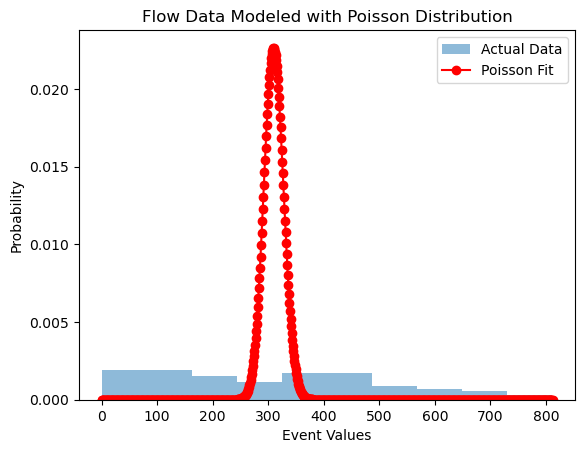

In [21]:
# Use the mean of the data as the parameter for the Poisson distribution
poisson_param = np.mean(result_array)

# Generate x values for plotting the PMF
x_values = np.arange(0, max(result_array) + 1)

# Calculate the PMF values using the Poisson distribution formula
poisson_pmf = poisson.pmf(x_values, mu=poisson_param)

# Plot the histogram of the data
plt.hist(result_array, bins=bin_size1, alpha=0.5, label='Actual Data', density=True)

# Plot the PMF (Probability Mass Function) of the Poisson distribution
plt.plot(x_values, poisson_pmf, 'ro-', label='Poisson Fit')

# Show the plot
plt.xlabel('Event Values')
plt.ylabel('Probability')
plt.title('Flow Data Modeled with Poisson Distribution')
plt.legend()
plt.show()

In [22]:
# Assuming a Poisson distribution with a certain lambda (adjust accordingly)
lambda_value = np.mean(result_array)
poisson_dist = poisson(lambda_value)

# Expected frequencies based on the Poisson distribution
expected_frequencies = poisson_dist.pmf(np.arange(0, np.max(result_array) + 1)) * len(result_array)

# Observed frequencies from your data
observed_frequencies, _ = np.histogram(result_array, bins=np.arange(0, np.max(result_array) + 2))

# Perform the chi-squared test
chi2_statistic, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Output the results
print(f'Chi-squared statistic: {chi2_statistic}')
print(f'P-value: {p_value}')

# Check the significance level (e.g., 0.05)
if p_value < 0.05:
    print('The null hypothesis is rejected. The data is significantly different from a Poisson distribution.')
else:
    print('The null hypothesis cannot be rejected. The data is not significantly different from a Poisson distribution.')
    

Chi-squared statistic: 1.1123674218552679e+132
P-value: 0.0
The null hypothesis is rejected. The data is significantly different from a Poisson distribution.


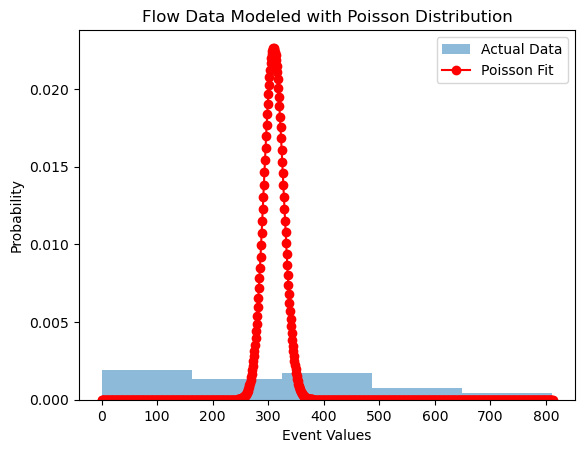

In [23]:
# Use the mean of the data as the parameter for the Poisson distribution
poisson_param = np.mean(result_array)

# Generate x values for plotting the PMF
x_values = np.arange(0, max(result_array) + 1)

# Calculate the PMF values using the Poisson distribution formula
poisson_pmf = poisson.pmf(x_values, mu=poisson_param)

# Plot the histogram of the data
plt.hist(result_array, bins=bin_size5, alpha=0.5, label='Actual Data', density=True)

# Plot the PMF (Probability Mass Function) of the Poisson distribution
plt.plot(x_values, poisson_pmf, 'ro-', label='Poisson Fit')

# Show the plot
plt.xlabel('Event Values')
plt.ylabel('Probability')
plt.title('Flow Data Modeled with Poisson Distribution')
plt.legend()
plt.show()

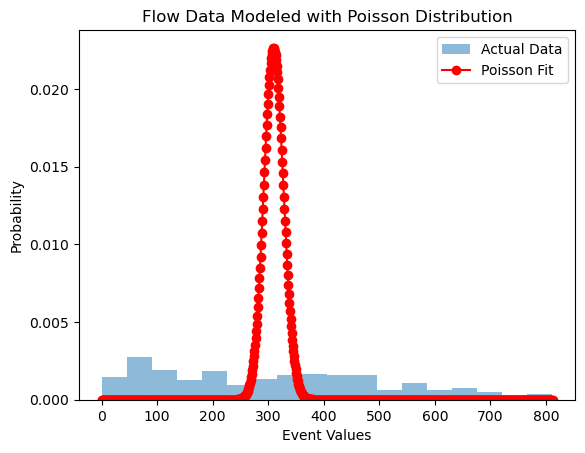

In [24]:
# Use the mean of the data as the parameter for the Poisson distribution
poisson_param = np.mean(result_array)

# Generate x values for plotting the PMF
x_values = np.arange(0, max(result_array) + 1)

# Calculate the PMF values using the Poisson distribution formula
poisson_pmf = poisson.pmf(x_values, mu=poisson_param)

# Plot the histogram of the data
plt.hist(result_array, bins=bin_size8, alpha=0.5, label='Actual Data', density=True)

# Plot the PMF (Probability Mass Function) of the Poisson distribution
plt.plot(x_values, poisson_pmf, 'ro-', label='Poisson Fit')

# Show the plot
plt.xlabel('Event Values')
plt.ylabel('Probability')
plt.title('Flow Data Modeled with Poisson Distribution')
plt.legend()
plt.show()